In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
import pandas_profiling

In [40]:
train_df = pd.read_csv('train.csv')
train_df

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,1956,Graduation,Together,46097.0,0,1,31-03-2013,11,5,...,6,4,0,0,0,0,0,0,0,241
1104,1104,1986,Graduation,Married,23477.0,1,0,21-10-2013,39,3,...,4,8,0,0,0,0,0,0,0,147
1105,1105,1975,Master,Married,37368.0,1,0,16-12-2013,4,1,...,2,6,1,0,0,0,0,0,0,30
1106,1106,1974,Graduation,Divorced,53034.0,1,1,30-05-2013,30,8,...,7,8,0,0,0,0,0,0,0,447


In [41]:
if not os.path.exists('train_profile.html'):
    train_df.profile_report().to_file(output_file="train_profile.html")

In [42]:
train_df.drop('id', axis=1, inplace=True)

In [43]:
train_df.groupby('Education')['Income'].median()

Education
2n Cycle      52195.0
Basic         19293.5
Graduation    51036.0
Master        50965.0
PhD           55236.0
Name: Income, dtype: float64

<Figure size 720x360 with 0 Axes>

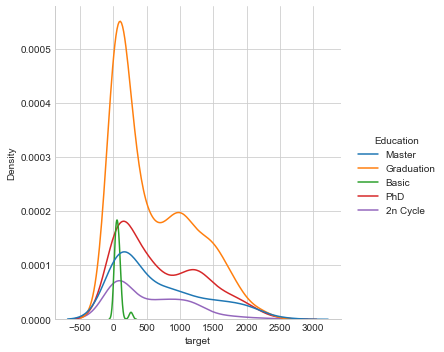

In [44]:
plt.figure(figsize=(10,5))
sns.displot(data=train_df, x='target', hue='Education', kind='kde')
plt.show()

In [45]:
train_df = pd.get_dummies(train_df, columns=['Education'])
train_df.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1974,Together,46014.0,1,1,21-01-2013,21,10,7,1,...,0,0,0,0,541,0,0,0,1,0
1,1962,Single,76624.0,0,1,24-05-2014,68,1,5,10,...,0,0,0,0,899,0,0,1,0,0
2,1951,Married,75903.0,0,1,08-04-2013,50,2,6,6,...,0,0,0,0,901,0,0,1,0,0
3,1974,Married,18393.0,1,0,29-03-2014,2,2,3,0,...,0,0,0,0,50,0,1,0,0,0
4,1946,Together,64014.0,2,1,10-06-2014,56,7,8,2,...,1,0,0,0,444,0,0,0,0,1


/opt/homebrew/Caskroom/miniforge/base/envs/afidev/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

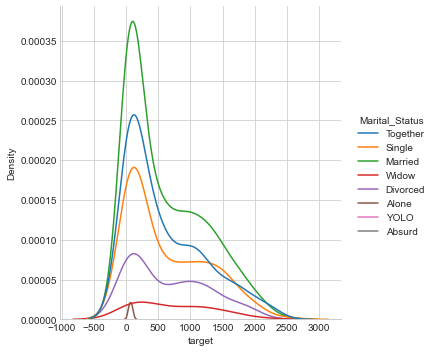

In [46]:
plt.figure(figsize=(10,5))
sns.displot(data=train_df, x='target', hue='Marital_Status', kind='kde')
plt.show()

In [47]:
train_df = pd.get_dummies(train_df, columns=['Marital_Status'])

In [48]:
train_df['Dt_Customer'] = pd.to_datetime(train_df['Dt_Customer'], format="%d-%m-%Y")
train_df['customer_year'] = train_df['Dt_Customer'].dt.year
train_df['customer_month'] = train_df['Dt_Customer'].dt.month
train_df['customer_day'] = train_df['Dt_Customer'].dt.day
train_df.drop('Dt_Customer', axis=1, inplace=True)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [54]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true - pred))
    return mae / np.mean(np.abs(true))

In [59]:
rf = RandomForestRegressor(n_estimators=10000, max_depth=100, random_state=0)

In [60]:
train_X, test_X, train_y, test_y = train_test_split(train_df.drop('target', axis=1), train_df['target'], test_size=0.2, random_state=0)

In [61]:
rf.fit(train_X, train_y)
pred = rf.predict(test_X)
NMAE(test_y, pred)

0.19979025284721724

In [70]:
rf = RandomForestRegressor(n_estimators=10000, max_depth=None, random_state=0)
rf.fit(train_df.drop('target', axis=1), train_df['target'])
pred = rf.predict(test_X)
NMAE(test_y, pred)

0.06680524102857961

In [71]:
test_df = pd.read_csv('test.csv')
test_df.drop('id', axis=1, inplace=True)
test_df = pd.get_dummies(test_df, columns=['Education'])
test_df = pd.get_dummies(test_df, columns=['Marital_Status'])
test_df['Dt_Customer'] = pd.to_datetime(test_df['Dt_Customer'], format="%d-%m-%Y")
test_df['customer_year'] = test_df['Dt_Customer'].dt.year
test_df['customer_month'] = test_df['Dt_Customer'].dt.month
test_df['customer_day'] = test_df['Dt_Customer'].dt.day
test_df.drop('Dt_Customer', axis=1, inplace=True)

In [72]:
sub = pd.read_csv('sample_submission.csv')
sub['target'] = rf.predict(test_df)
sub

,id,target
0,0,569.9423
1,1,994.2153
2,2,895.2765
3,3,1170.6651
4,4,1385.0600
...,...,...
1103,1103,86.3316
1104,1104,39.0312
1105,1105,67.2372
1106,1106,1264.9688


In [68]:
sub.to_csv('submission.csv', index=False)